# Eclat

# Dataset

Each row in the dataset represents a shopping trip made by a different customer. It includes all the items they bought in that transaction, just like a receipt from a store. This helps us understand which products are often purchased together, making it useful for analyzing shopping patterns and creating better recommendations.

In [1]:
%cat '../00_data/Market_Basket_Optimisation.csv'|head

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs
chutney
turkey,avocado
mineral water,milk,energy bar,whole wheat rice,green tea
low fat yogurt
whole wheat pasta,french fries
soup,light cream,shallot
frozen vegetables,spaghetti,green tea
french fries
cat: stdout: Broken pipe


In [2]:
%cat '../00_data/Market_Basket_Optimisation.csv'|tail

herb & pepper
chocolate,escalope
burgers,salmon,pancakes,french fries,frozen smoothie,fresh bread,mint
turkey,burgers,dessert wine,shrimp,pasta,tomatoes,pepper,milk,pancakes,whole wheat rice,oil,frozen smoothie
pancakes,light mayo
butter,light mayo,fresh bread
burgers,frozen vegetables,eggs,french fries,magazines,green tea
chicken
escalope,green tea
eggs,frozen smoothie,yogurt cake,low fat yogurt


## Libraries Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

> **Note!** There is no header in the dataset.

In [4]:
df = pd.read_csv('../00_data/Market_Basket_Optimisation.csv', decimal='.', sep=',', header=None, na_values=pd.NA)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7501, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
np.sum(df.isna(), axis=0)

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

## Data Preprocessing

In [8]:
transactions = []
for i in range(0, df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(0, df.shape[1]) if not pd.isna(df.values[i, j])])

transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

## Library `apyori`

> **Note!** This is simulation of the `Eclat` algorithm with the `apyori` library.

In [9]:
#!pip3 install apyori

In [10]:
from apyori import apriori as apyori_apriori

itemsets = apyori_apriori(transactions=transactions, 
                # the item must appear in at least 3 transactions per day for a week
                # as minimum to include it into the analisys
                # 3 * 7 / 7501
                min_support=0.003,
                #min_confidence=0.2,
                #min_lift=3,
                # consider sets with 2 items
                #min_length=2, 
                #max_length=2
                         )
results = list(itemsets)

### Inspect the well organized rules

In [11]:
def inspect(results):
    lhs = [tuple(stat.items_base)[0] if stat.items_base else None  for result in results for stat in result.ordered_statistics]
    rhs = [tuple(stat.items_add)[0]if stat.items_add else None for result in results for stat in result.ordered_statistics]
    supports = [result.support for result in results for _ in result.ordered_statistics]
    
    rules_list = [(lhs, rhs, support) for lhs, rhs, support in zip(lhs, rhs, supports) if lhs is not None and rhs is not None]

    # make Data frame
    df = pd.DataFrame(rules_list, 
                  columns=['Product 1', 
                           'Product 2', 
                           'Support'])
    
    return df


In [12]:
results_df = inspect(results)
results_df = results_df[results_df['Product 1'].notnull() & results_df['Product 2'].notnull()]
# normalize order
results_df[['Product 1', 'Product 2']] = results_df[['Product 1', 'Product 2']].apply(lambda x: sorted(x), axis=1, result_type='expand')
# Remove duplicate rules
results_df = results_df.drop_duplicates(subset=['Product 1', 'Product 2'])
results_df

,Product 1,Product 2,Support
0,almonds,burgers,0.005199
2,almonds,cake,0.003066
4,almonds,chocolate,0.005999
6,almonds,eggs,0.006532
8,almonds,french fries,0.004399
...,...,...,...
1562,tomato juice,turkey,0.003200
1564,tomatoes,turkey,0.006532
1566,tomatoes,vegetables mix,0.003200
1568,tomatoes,whole wheat rice,0.005999


In [13]:
results_df.nlargest(n = 10, columns=['Support'])

,Product 1,Product 2,Support
1394,mineral water,spaghetti,0.059725
482,chocolate,mineral water,0.052660
678,eggs,mineral water,0.050927
1324,milk,mineral water,0.047994
1154,ground beef,mineral water,0.040928
512,chocolate,spaghetti,0.039195
1178,ground beef,spaghetti,0.039195
706,eggs,spaghetti,0.036528
640,eggs,french fries,0.036395
1014,frozen vegetables,mineral water,0.035729


## Library `mlxtend`

> **Note!** This is simulation of the `Eclat` algorithm with the `mlxtend` library.

In [14]:
#!pip install mlxtend

In [15]:
from mlxtend.frequent_patterns import apriori as mlxtend_apriori
from mlxtend.preprocessing import TransactionEncoder

### Find the optimal `min_support`

In [16]:
def find_elbow(x, y):
    second_derivative = np.gradient(np.gradient(y))
    elbow_idx = np.argmax(second_derivative)  # Maximum curvature point
    return x[elbow_idx]

Elbow Point: 0.002


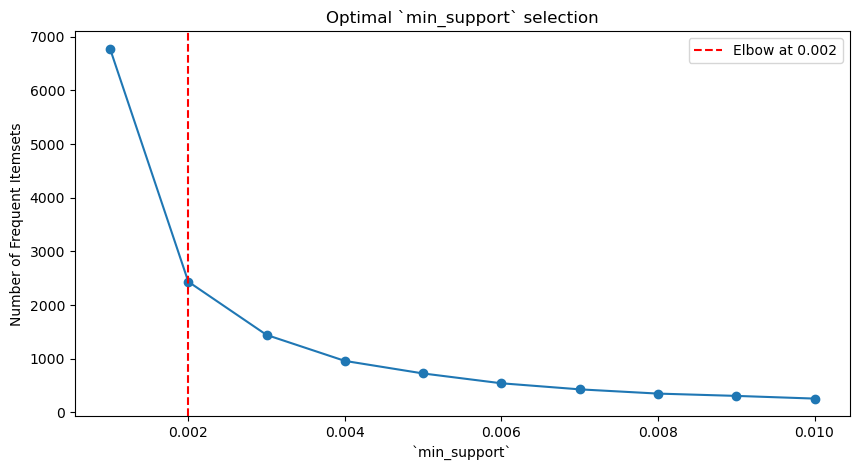

In [17]:
te = TransactionEncoder()
transactions_encoded = te.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=te.columns_)

# find the optimal min_support
support_values = np.linspace(0.001, 0.01, 10)  # 0,1%-1%
results = {}

for support in support_values:
    frequent_itemsets = mlxtend_apriori(transactions_df, min_support=support, use_colnames=True)
    results[support] = len(frequent_itemsets)

elbow = find_elbow(list(results.keys()), list(results.values()))
print(f"Elbow Point: {elbow}")

plt.figure(figsize=(10, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.axvline(elbow, color='r', linestyle='--', label=f'Elbow at {elbow}')
plt.xlabel('`min_support`')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Optimal `min_support` selection')
plt.legend()
plt.show()

+ If `min_support` is too **low**, many itemsets appear, including insignificant ones.
+ If `min_support` is too **high**, useful patterns may disappear.
+ The optimal `min_support` is found at the "elbow" of the graph, where the curve sharply drops and then stabilizes.

The value $0.002$ is the optimal value of `min_support`.

In [18]:
# simulate Eclat
frequent_itemsets = mlxtend_apriori(transactions_df, min_support=0.002, use_colnames=True)

### Inspect the well organized rules

In [19]:
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

frequent_itemsets[['product 1', 'product 2']] = frequent_itemsets['itemsets'].apply(lambda x: pd.Series(list(x)))
frequent_itemsets = frequent_itemsets[['product 1', 'product 2', 'support']]
frequent_itemsets[['product 1', 'product 2']] = frequent_itemsets[['product 1', 'product 2']].apply(lambda x: sorted(x), axis=1, result_type='expand')
frequent_itemsets = frequent_itemsets.drop_duplicates(subset=['product 1', 'product 2'])

frequent_itemsets.nlargest(n=10, columns=['support'])

,product 1,product 2,support
1125,mineral water,spaghetti,0.059725
473,chocolate,mineral water,0.052660
618,eggs,mineral water,0.050927
1081,milk,mineral water,0.047994
953,ground beef,mineral water,0.040928
489,chocolate,spaghetti,0.039195
968,ground beef,spaghetti,0.039195
635,eggs,spaghetti,0.036528
596,eggs,french fries,0.036395
852,frozen vegetables,mineral water,0.035729


In [20]:
# compare to `apyori` lib result
results_df.nlargest(n = 10, columns=['Support'])

,Product 1,Product 2,Support
1394,mineral water,spaghetti,0.059725
482,chocolate,mineral water,0.052660
678,eggs,mineral water,0.050927
1324,milk,mineral water,0.047994
1154,ground beef,mineral water,0.040928
512,chocolate,spaghetti,0.039195
1178,ground beef,spaghetti,0.039195
706,eggs,spaghetti,0.036528
640,eggs,french fries,0.036395
1014,frozen vegetables,mineral water,0.035729
